In [1]:
from model import OrientationWei
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = OrientationWei()

Try out the likelihood function for a few different $m$s

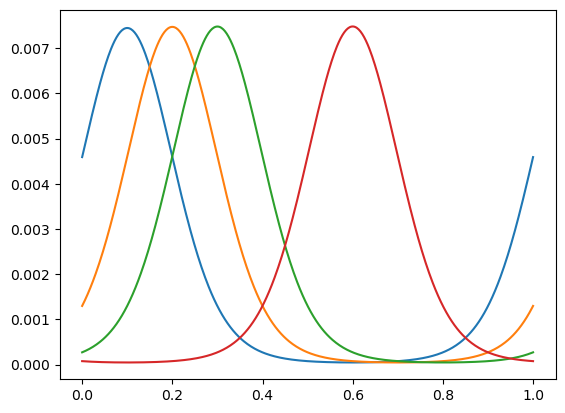

In [3]:
x_rep = model.rep_grid
plt.plot(x_rep, np.squeeze(model.rep_likelihood([.1, .2, .3, .6], x_rep, .1)).T)

Check that if we convert a prior distribution in stimulus space, we get a uniform in representational space

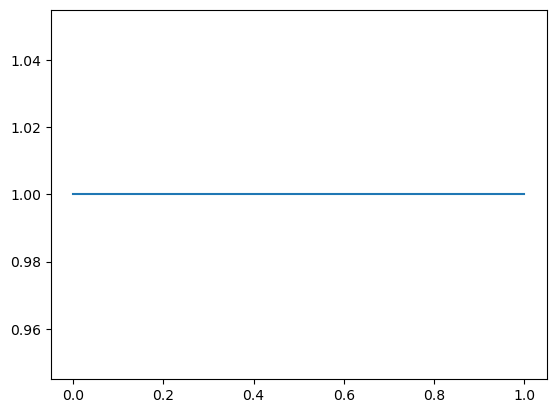

In [4]:
x_stim = model.stim_grid
prior = model.prior(x_stim)

plt.plot(*model.stim2rep(x_stim, prior))

Check that if we convert a uniform distribution to stimulus space, we get back the prior

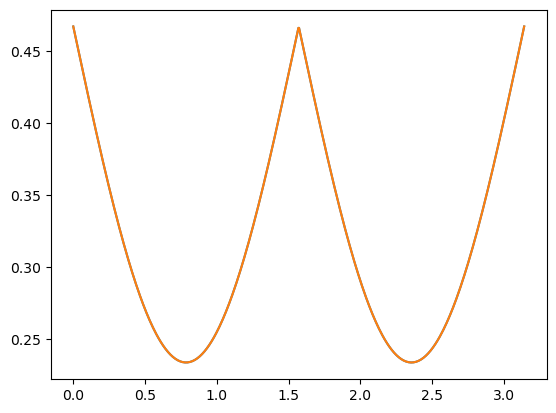

In [5]:
x_rep = model.rep_grid
prior = np.ones_like(x_rep)

plt.plot(*model.rep2stim(x_rep, prior))

plt.plot(model.stim_grid_, model.prior(model.stim_grid_))

Go through $m$ and see what is the best estimate of $F^{-1}(\widetilde{\theta})$

Text(0, 0.5, '$\\hat{\\theta}_{L_2}(m)$')

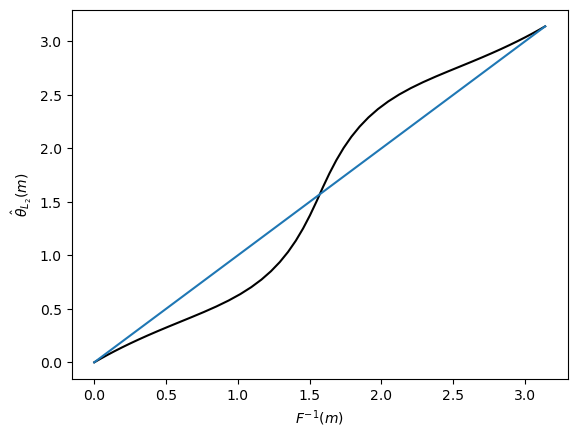

In [6]:
x_rep = np.linspace(1e-6, 1-1e-6)

x_stim = model.rep2stim(x_rep)

plt.plot(x_stim, np.squeeze(model.subject_estimate_theta(x_rep, 2.)), c='k')
plt.plot([0, np.pi], [0,np.pi])
plt.xlabel(r'$F^{-1}(m)$')
plt.ylabel(r'$\hat{\theta}_{L_2}(m)$')

Plot Subject likelihood $K(F(\theta_0), \widetilde{\theta})$ and $\mathcal{L}_{\theta_0}(\widetilde{\theta})$ for 

$\theta_0 = 0.3\pi$ 


$\mathcal{L}_{\theta_0}(\widetilde{\theta})$ is wider than $K(m, \widetilde{\theta})$, since there is both uncertainty of the subject about which $\theta$ caused $m$, but also uncertainty due to the fact that, even though we know $\theta_0$, we don't know which $m$ it led to in the subject.


(1, 500, 1)


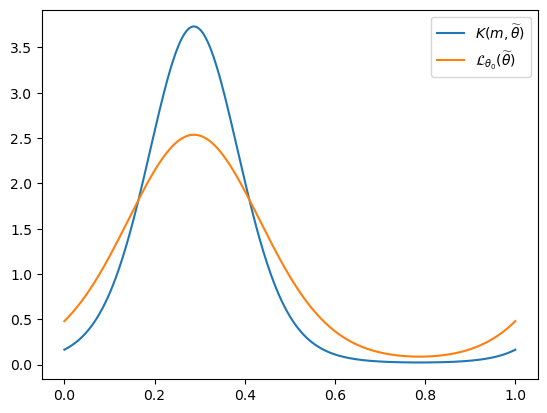

In [7]:
theta0 = .3 * np.pi
m = model.stim2rep(theta0)
sigma_rep = .1

x_rep = model.rep_grid

plt.plot(x_rep, np.squeeze(model.rep_likelihood(m, x_rep, sigma_rep, norm=False)), label=r'$K(m, \widetilde{\theta})$')
plt.plot(x_rep, np.squeeze(model.model_likelihood(theta0, x_rep, sigma_rep)), label=r'$\mathcal{L}_{\theta_0}(\widetilde{\theta})$')

plt.legend()

Plot average estimate of the subject $\langle {\hat{\theta}_{L_2}}_{\theta_0} \rangle$ versus the actual $\theta_0$

(50, 500, 1)


Text(0, 0.5, '$\\langle {\\hat{\\theta}_{L_2}}_{\\theta_0} \\rangle$')

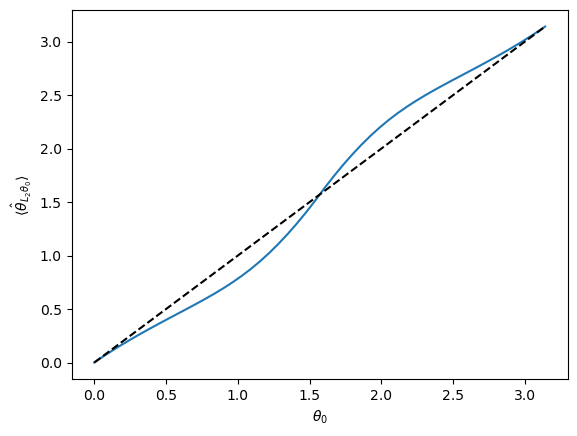

In [8]:
theta0 = np.linspace(0.0, np.pi)
sigma_rep = .4

plt.plot(theta0, model.model_estimate_theta(theta0, sigma_rep))
plt.plot([0, np.pi], [0, np.pi], c='k', ls='--')

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\langle {\hat{\theta}_{L_2}}_{\theta_0} \rangle$')